**Boston Housing Data Prediction**

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

In [196]:
data1 = pd.read_csv('/home/nkumar/Downloads/Boston.csv')

In [197]:
data1[:11]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


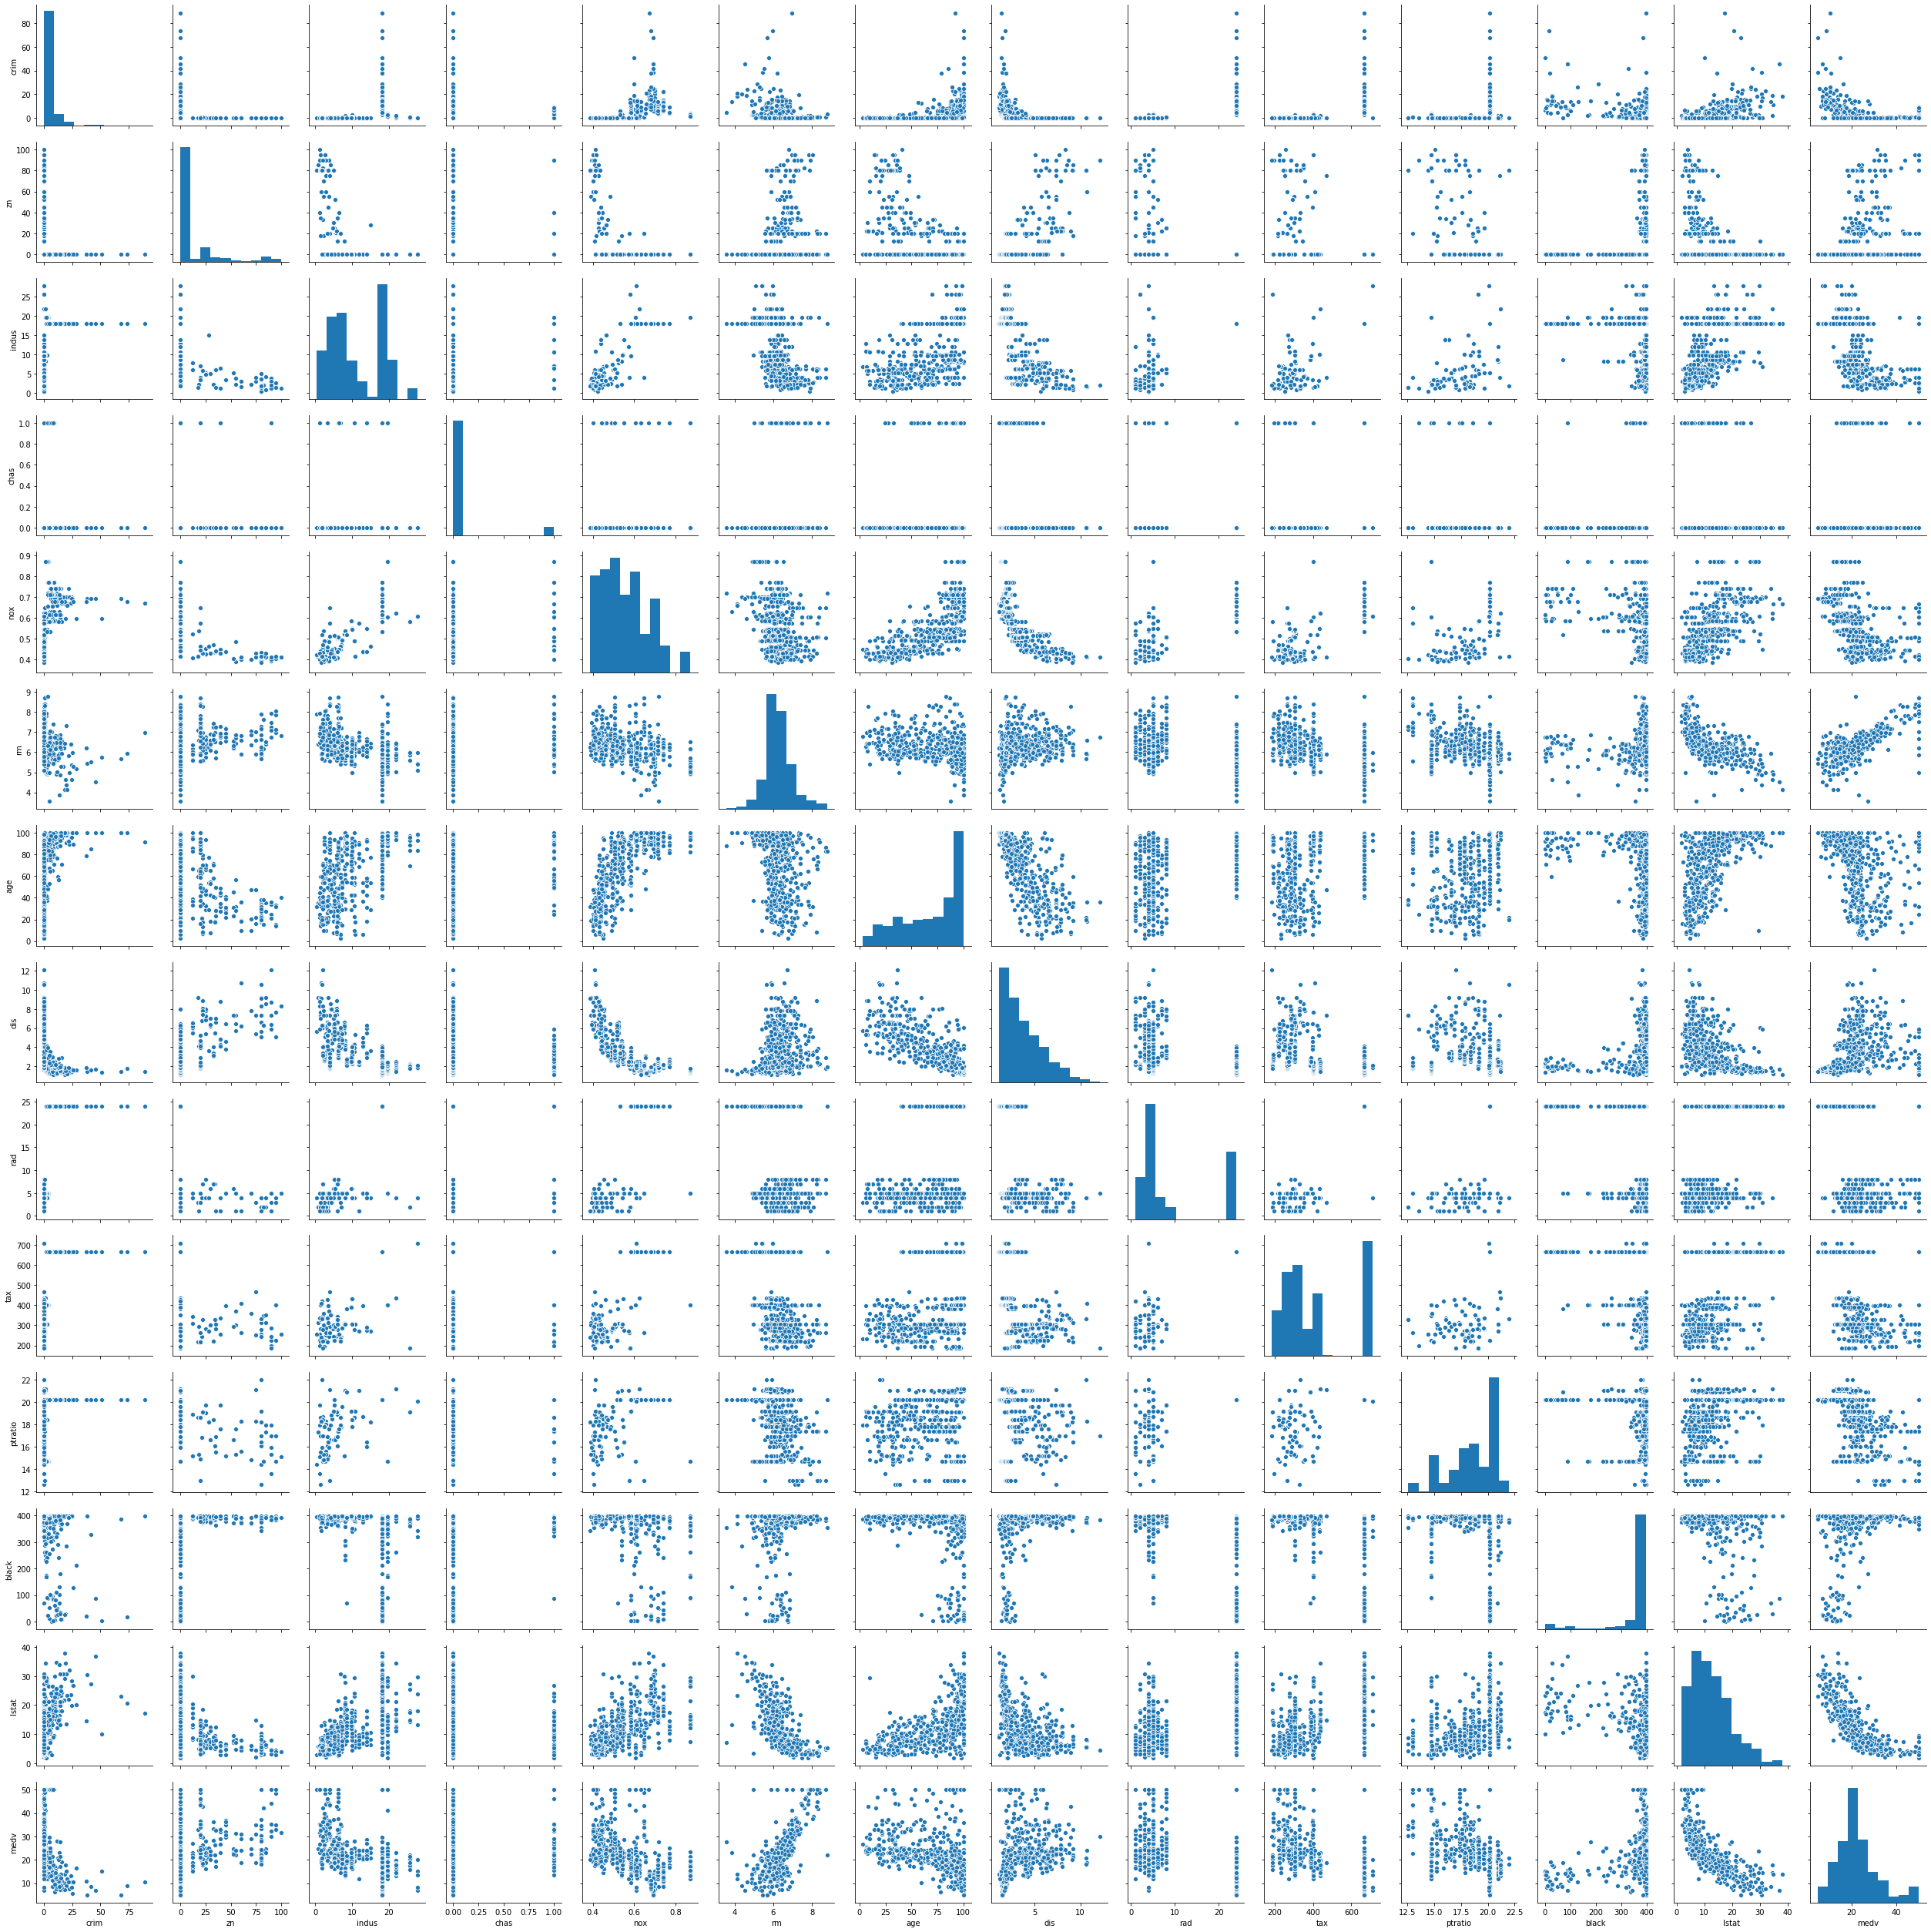

In [198]:
sns.pairplot(data1)

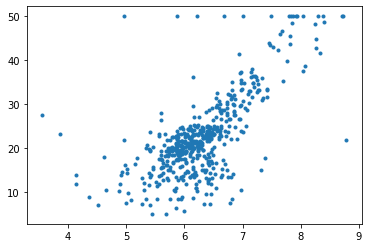

In [104]:
plt.scatter(data1.rm.values.reshape(-1,1), data1.medv.values.reshape(-1,1), marker = '.')

In [126]:
x_train, x_test, y_train, y_test = train_test_split(data1.iloc[:,:13], data1.medv)

In [178]:
x_train = sm.add_constant(x_train)
sm1 = sm.OLS(y_train, x_train)
x_train

/home/nkumar/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
412,1.0,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37
225,1.0,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,382.00,4.63
494,1.0,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59
65,1.0,0.03584,80.0,3.37,0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
173,1.0,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,1.0,16.81180,0.0,18.10,0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
52,1.0,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28
323,1.0,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
180,1.0,0.06588,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,193,17.8,395.56,7.56


In [119]:
sm2 = sm1.fit()

In [120]:
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     85.12
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          6.95e-102
Time:                        14:47:58   Log-Likelihood:                -1101.4
No. Observations:                 379   AIC:                             2231.
Df Residuals:                     365   BIC:                             2286.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6464      5.675      5.577      0.000      20.487      42.806
crim          -0.1220      0.033     -3.723      0.000      -0.186      -0.058
zn             0.0442      0.015      2.993      0.003       0.015       0.073
indus          0.0808      0.068      1.195      0.233      -0.052       0.214
chas           3.0806      0.983      3.134      0.002       1.148       5.014
nox          -15.4944      4.319     -3.587      0.000     -23.988      -7.001
rm             4.1126      0.462      8.905      0.000       3.204       5.021
age           -0.0082      0.014     -0.581      0.561      -0.036       0.019
dis           -1.3794      0.221     -6.229      0.000      -1.815      -0.944
rad            0.3222      0.074      4.326      0.000       0.176       0.469
tax           -0.0131      0.004     -3.172      0.002      -0.021      -0.005
ptratio       -0.9049      0.145     -6.237      0.000      -1.190      -0.620
black          0.0108      0.003      3.797      0.000       0.005       0.016
lstat         -0.5356      0.057     -9.473      0.000      -0.647      -0.424
==============================================================================
Omnibus:                      112.264   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.349
Skew:                           1.390   Prob(JB):                     3.33e-69
Kurtosis:                       6.499   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

In [116]:
data1.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

**Taking Columns With Low P-Value**

In [193]:
s = 0
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(data1.iloc[:,[0,1,3,4,5,7,8,9,10,11,12]], data1.medv)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    s = s+ model.score(x_test, y_test)
    if i%10 == 0:
        print('.', end="")
print("\n Accuracy: " + str(s/10) + " %")

....................................................................................................
 Accuracy: 71.57874454149456 %


**Taking All The Columns**

In [194]:
q = 0
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(data1.iloc[:,:13], data1.medv)

    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    q = q+ model.score(x_test, y_test)
    if i%10 == 0:
        print('.', end="")
print("\n Accuracy: " + str(q/10) + " %")

....................................................................................................
 Accuracy: 71.17328010194487 %


-----

**College Data**

In [190]:
data = pd.read_csv('/home/nkumar/Downloads/College.csv')Boston